# importing the modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
pew_data = pd.read_csv('pew.csv')

In [3]:
print('The dataset is: ')
pew_data.head()

The dataset is: 


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


# Checking the datashape

In [4]:
pew_data.shape

(18, 11)

# Displaying the information about the dataset

In [5]:
print('The information of dataset: ')
pew_data.info()

The information of dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
religion              18 non-null object
<$10k                 18 non-null int64
$10-20k               18 non-null int64
$20-30k               18 non-null int64
$30-40k               18 non-null int64
$40-50k               18 non-null int64
$50-75k               18 non-null int64
$75-100k              18 non-null int64
$100-150k             18 non-null int64
>150k                 18 non-null int64
Don't know/refused    18 non-null int64
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


# meting the dataset to determine the working format

In [6]:
pew_data_melt = pd.melt(pew_data,id_vars=['religion'], 
                        var_name = 'IncomeDollarsPerThousand',  
                        value_name='Number of followers')
print('The dataset in working format: ')
pew_data_melt.head()

The dataset in working format: 


,religion,IncomeDollarsPerThousand,Number of followers
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


In [7]:
pew_data_melt.shape

(180, 3)

# Formatting the income column

In [8]:
pew_data_melt['IncomeDollarsPerThousand'] = pew_data_melt.IncomeDollarsPerThousand.\
str.replace('k', '').str.replace('$', '').str.replace('<', '').str.replace('>', '')

# Renaming the column

In [9]:
pew_data_melt = pew_data_melt.rename(columns={"religion": "Religion"})

# Taking the maximum range of income

In [10]:
pew_data_melt['IncomeDollarsPerThousand'] = pew_data_melt['IncomeDollarsPerThousand'].\
str.split('-').str[-1]

# Describing the new dataframe

In [11]:
pew_data_melt.describe(include = 'all')

,Religion,IncomeDollarsPerThousand,Number of followers
count,180,180,180.000000
unique,18,9,NaN
top,Mormon,150,NaN
freq,10,36,NaN
mean,NaN,NaN,197.533333
std,NaN,NaN,326.548693
min,NaN,NaN,1.000000
25%,NaN,NaN,18.000000
50%,NaN,NaN,46.000000
75%,NaN,NaN,218.500000


In [12]:
pew_data_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
Religion                    180 non-null object
IncomeDollarsPerThousand    180 non-null object
Number of followers         180 non-null int64
dtypes: int64(1), object(2)
memory usage: 4.3+ KB


# Selecting the particular religion and displaying the information

In [13]:
religion_agno = pew_data_melt.loc[pew_data_melt['Religion'] == 'Agnostic']
print('Selecting a particular religion and displaying its information: ')
religion_agno

Selecting a particular religion and displaying its information: 


,Religion,IncomeDollarsPerThousand,Number of followers
0,Agnostic,10,27
18,Agnostic,20,34
36,Agnostic,30,60
54,Agnostic,40,81
72,Agnostic,50,76
90,Agnostic,75,137
108,Agnostic,100,122
126,Agnostic,150,109
144,Agnostic,150,84
162,Agnostic,Don't now/refused,96


In [14]:
print('The income column after formatting: ')
religion_agno = pew_data_melt.loc[pew_data_melt['Religion'] == 'Agnostic']
religion_agno

The income column after formatting: 


,Religion,IncomeDollarsPerThousand,Number of followers
0,Agnostic,10,27
18,Agnostic,20,34
36,Agnostic,30,60
54,Agnostic,40,81
72,Agnostic,50,76
90,Agnostic,75,137
108,Agnostic,100,122
126,Agnostic,150,109
144,Agnostic,150,84
162,Agnostic,Don't now/refused,96


# Removing "Don't now/refused" value from the dataframe and creating a new dataframe

In [15]:
print('''Creating the "Don't now/refused" dataframe''')
do_not_know = pew_data_melt.loc[pew_data_melt['IncomeDollarsPerThousand'] == 
                                "Don't now/refused"]
do_not_know

Creating the "Don't now/refused" dataframe


,Religion,IncomeDollarsPerThousand,Number of followers
162,Agnostic,Don't now/refused,96
163,Atheist,Don't now/refused,76
164,Buddhist,Don't now/refused,54
165,Catholic,Don't now/refused,1489
166,Don’t know/refused,Don't now/refused,116
167,Evangelical Prot,Don't now/refused,1529
168,Hindu,Don't now/refused,37
169,Historically Black Prot,Don't now/refused,339
170,Jehovah's Witness,Don't now/refused,37
171,Jewish,Don't now/refused,162


# Taking only int type of income as Specified dataframe

In [16]:
print('Specified dataframe: ')
pew_useful_data = pew_data_melt[pew_data_melt.IncomeDollarsPerThousand != 
                                "Don't now/refused"]
pew_useful_data

Specified dataframe: 


,Religion,IncomeDollarsPerThousand,Number of followers
0,Agnostic,10,27
1,Atheist,10,12
2,Buddhist,10,27
3,Catholic,10,418
4,Don’t know/refused,10,15
...,...,...,...
157,Orthodox,150,46
158,Other Christian,150,12
159,Other Faiths,150,41
160,Other World Religions,150,4


In [17]:
pew_useful_data['IncomeDollarsPerThousand'] = pew_useful_data['IncomeDollarsPerThousand'].\
astype(str).astype(int)

/Applications/ANACONDA/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
print('The changed datatype of income column: ')
pew_useful_data.info()

The changed datatype of income column: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 3 columns):
Religion                    162 non-null object
IncomeDollarsPerThousand    162 non-null int64
Number of followers         162 non-null int64
dtypes: int64(2), object(1)
memory usage: 5.1+ KB


In [19]:
pew_useful_data

,Religion,IncomeDollarsPerThousand,Number of followers
0,Agnostic,10,27
1,Atheist,10,12
2,Buddhist,10,27
3,Catholic,10,418
4,Don’t know/refused,10,15
...,...,...,...
157,Orthodox,150,46
158,Other Christian,150,12
159,Other Faiths,150,41
160,Other World Religions,150,4


In [20]:
pew_useful_data.describe()

,IncomeDollarsPerThousand,Number of followers
count,162.000000,162.000000
mean,69.444444,181.697531
std,50.402110,293.791854
min,10.000000,1.000000
25%,30.000000,17.000000
50%,50.000000,41.500000
75%,100.000000,212.000000
max,150.000000,1486.000000


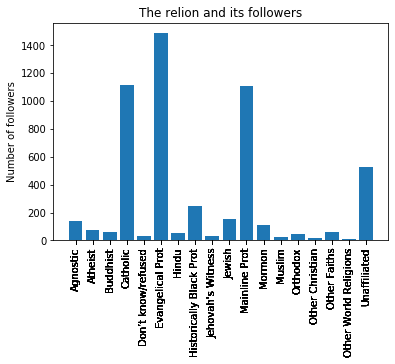

In [21]:
x = pew_useful_data['Religion']
y = pew_useful_data['Number of followers']

fig, ax = plt.subplots()
plt.bar(x, y)
plt.xticks(x, pew_useful_data['Religion'], rotation='vertical')
plt.ylabel('Number of followers')
plt.title('The relion and its followers')
plt.show()

# Printing the different religion

In [22]:
 pew_useful_data.Religion.unique().tolist()

['Agnostic',
 'Atheist',
 'Buddhist',
 'Catholic',
 'Don’t know/refused',
 'Evangelical Prot',
 'Hindu',
 'Historically Black Prot',
 "Jehovah's Witness",
 'Jewish',
 'Mainline Prot',
 'Mormon',
 'Muslim',
 'Orthodox',
 'Other Christian',
 'Other Faiths',
 'Other World Religions',
 'Unaffiliated']

# Calculating the number of people following a particular religion

In [23]:
print('Total count according to the Number of followers per religion: ')
freq_sum = pew_useful_data.groupby('Religion')['Number of followers'].sum()
freq_sum = pd.DataFrame(freq_sum)
freq_sum

Total count according to the Number of followers per religion: 


,Number of followers
Religion,
Agnostic,730
Atheist,439
Buddhist,357
Catholic,6565
Don’t know/refused,156
Evangelical Prot,7943
Hindu,220
Historically Black Prot,1656
Jehovah's Witness,178


# Creating a style highliting the maximum value

In [24]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Creating a style highliting the minimum value

In [25]:
def highlight_min(s):
    '''
    highlight the minimun in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: red' if v else '' for v in is_min]

# Applying the min and max highliting in the freq_sum dataframe

In [26]:
print('Highliting the min and max followers of a religion')
freq_sum.style.\
    apply(highlight_min).\
    apply(highlight_max)

Highliting the min and max followers of a religion


,Number of followers
Religion,
Agnostic,730
Atheist,439
Buddhist,357
Catholic,6565
Don’t know/refused,156
Evangelical Prot,7943
Hindu,220
Historically Black Prot,1656
Jehovah's Witness,178


# Calculating a mean income for the particular range

In [27]:
# rounding as people

In [28]:
print('The follower mean according to income: ')
x = pew_useful_data.groupby('IncomeDollarsPerThousand').mean()
x = x.round({'Number of followers': 0})
x

The follower mean according to income: 


,Number of followers
IncomeDollarsPerThousand,
10,107.0
20,154.0
30,186.0
40,183.0
50,171.0
75,288.0
100,222.0
150,161.0


In [29]:
print('The total income mean: ')
pew_useful_data.groupby('IncomeDollarsPerThousand').mean().mean()


The total income mean: 


Number of followers    184.253472
dtype: float64

# Highlighting the max mean income

In [30]:
print('Highlighting the max mean income')
x.style.apply(highlight_max)

Highlighting the max mean income


,Number of followers
IncomeDollarsPerThousand,
10,107
20,154
30,186
40,183
50,171
75,288
100,222
150,161


# Creating a function of dipicting less value in red

In [31]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 181 else 'black'
    return 'color: %s' % color

# Highlighting the max mean and styling values less than mean in red

In [32]:
x.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Number of followers
IncomeDollarsPerThousand,
10,107
20,154
30,186
40,183
50,171
75,288
100,222
150,161


In [33]:
s = x.style.applymap(color_negative_red)
s

,Number of followers
IncomeDollarsPerThousand,
10,107
20,154
30,186
40,183
50,171
75,288
100,222
150,161


# Calculating the sum of all income group

In [34]:
print('The sum of income per religion per income group:  ')
pew_useful_data.groupby('IncomeDollarsPerThousand').sum()

The sum of income per religion per income group:  


,Number of followers
IncomeDollarsPerThousand,
10,1930
20,2781
30,3357
40,3302
50,3085
75,5185
100,3990
150,5805


# Determing the co-relation cooefficient

In [35]:
pew_useful_data['IncomeDollarsPerThousand'].corr(pew_useful_data['Number of followers'])

0.03208320172817475

# Generating the heat map showing the corelation between columns

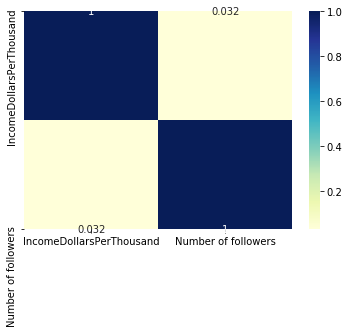

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = pew_useful_data.corr()

sn.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
plt.show()

# taking on Hindu religion

In [37]:
religion_hindu = pew_useful_data.loc[pew_useful_data['Religion'] == 'Hindu']
religion_hindu

,Religion,IncomeDollarsPerThousand,Number of followers
6,Hindu,10,1
24,Hindu,20,9
42,Hindu,30,7
60,Hindu,40,9
78,Hindu,50,11
96,Hindu,75,34
114,Hindu,100,47
132,Hindu,150,48
150,Hindu,150,54


In [38]:
mean_income = religion_hindu['IncomeDollarsPerThousand'].mean()
print('The mean income in this religion group is: ')
mean_income

The mean income in this religion group is: 


69.44444444444444